# Fraud Detection Dataset Project
## Tom Ritman-Meer using Google Colaboratory notebook

In this notebook I have deployed machine learning models to predict the probability of a credit card transaction being fraudulent based a number of PCA parameters.

The project consists of the following steps:

* Retrieving the dataset from Kaggle.com
* Exploratory Data Analysis
* Feature Engineering of the data into a suitable form for models
* Building and comparing machine learning models

In [1]:
# Steps to download creditcard.csv from kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 70% 46.0M/66.0M [00:00<00:00, 172MB/s]
100% 66.0M/66.0M [00:00<00:00, 220MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df[df['Class']==0]['Time'].describe()

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

In [5]:
df[df['Class']==1]['Time'].describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [10]:
df.groupby('Class')['Class'].count()

Class
0    284315
1       492
Name: Class, dtype: int64

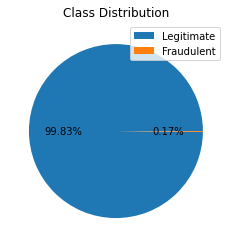

In [34]:
plt.figure(figsize=(4,4))

#explode = [0,0.001]
plt.pie(df['Class'].value_counts(),autopct='%1.2f%%')
plt.legend(labels=['Legitimate','Fraudulent'])
plt.title('Class Distribution');

#Data is highly unbalanced.

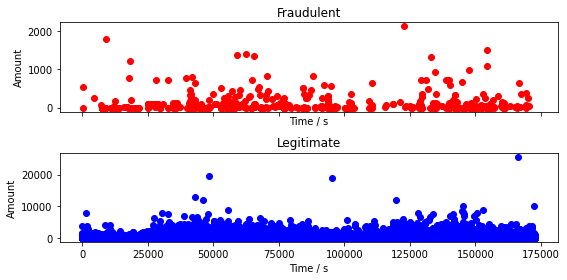

In [15]:
fraudulent = df[df['Class'] == 1]
legitimate = df[df['Class'] == 0]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 4))

ax[0].scatter(fraudulent['Time'], fraudulent['Amount'], c='red')
ax[0].set_title('Fraudulent')
ax[0].set_xlabel('Time / s')
ax[0].set_ylabel('Amount')
ax[1].scatter(legitimate['Time'], legitimate['Amount'],c='blue')
ax[1].set_title('Legitimate')
ax[1].set_xlabel('Time / s')
ax[1].set_ylabel('Amount')
plt.tight_layout()

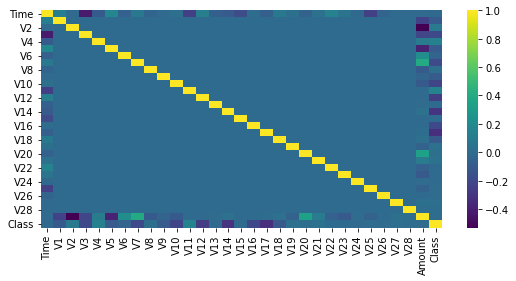

In [21]:
plt.figure(figsize=(9,4))
sns.heatmap(df.corr(),cmap='viridis')

Let's look at a subset of the correlation heatmap, since most of the variables do not have any strong correlation with one another.

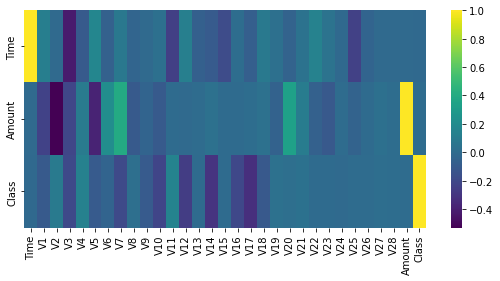

In [22]:
plt.figure(figsize=(9,4))
sns.heatmap(df.corr().loc[['Time','Amount','Class']],cmap='viridis')

There is no obviously strong correlation between the transaction class and any of the 30 variables.

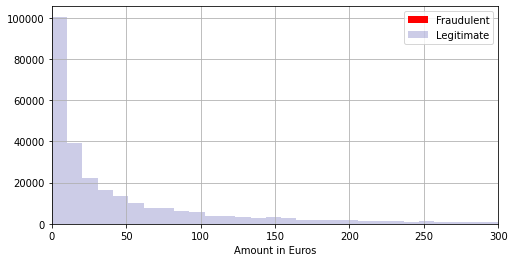

In [26]:
plt.figure(figsize=(8,4))

df[df['Class']==1]['Amount'].hist(alpha=1,color='red', bins=2500,label='Fraudulent')
df[df['Class']==0]['Amount'].hist(alpha=0.2,color='darkblue', bins=2500,label='Legitimate')

plt.legend()
plt.xlabel('Amount in Euros')
plt.xlim(0,300)
sns.histplot()

The fraudulent transactions are so sparse that they do not show on a histogram showing the distribution of transactions by their amount in Euros. These histograms are thus plotted separately below. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Fraudulent Transactions')

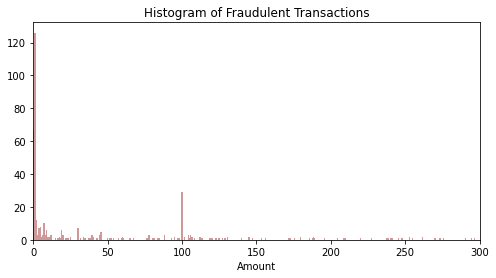

In [27]:
plt.figure(figsize=(8,4))
sns.distplot(df[df['Class']==1]['Amount'],kde=False,bins=2500,color='darkred')
plt.xlim(0,300)
plt.title('Histogram of Fraudulent Transactions')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Legitimate Transactions')

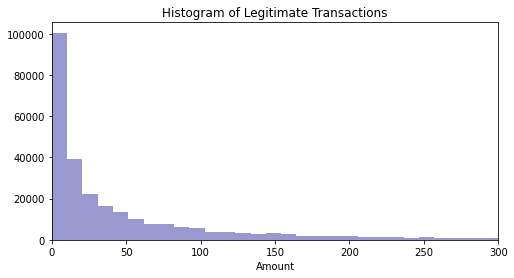

In [28]:
plt.figure(figsize=(8,4))
sns.distplot(df[df['Class']==0]['Amount'],kde=False,bins=2500,color='darkblue')
plt.xlim(0,300)
plt.title('Histogram of Legitimate Transactions')

(0.0, 280.0)

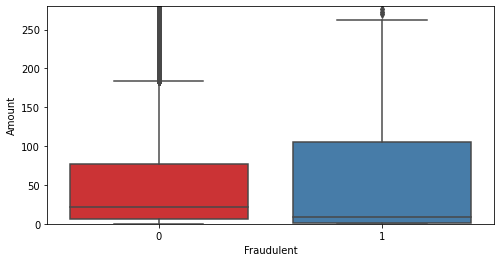

In [35]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Class',y='Amount',data=df,palette='Set1')
plt.xlabel('Fraudulent')
plt.ylim(0,280)

In [36]:
from sklearn.model_selection import train_test_split

In [63]:
X = df.drop('Class',axis=1)
y = df['Class']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
#data needs to be scaled to give accurate parameter weighting for machine learning models
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

First try logistic regression classifier model

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.89      0.60      0.72        97

    accuracy                           1.00     56962
   macro avg       0.95      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962

[[56858     7]
 [   39    58]]


The model correctly categorised the overwhelming majority of non-fraudulent transactions but 39 of 97 fraudulent transactions were wrongly classified. This is not a great result, let's try a different model.

Try K Nearest Neighbours classifier with n = 1

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [69]:
pred = knn.predict(X_test)

In [70]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.87      0.79      0.83        97

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56853    12]
 [   20    77]]


The KNN model reduces the number of wrongly classified fraudulent transactions to 20/97, which is a much better result. Only 12 out of 56,871 legitimate transactions are wrongly categorised as fraudulent.

Try a random forest classifier with 100 iterations

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [72]:
print('Classification Report \n')
print(classification_report(y_test,predictions))
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test,predictions))

Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.98      0.82      0.89        97

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962


 Confusion Matrix 

[[56863     2]
 [   17    80]]


Random forest classifier reduces the number of false positives to 2 and performs slightly better than the KNN algorishm on the fraudulent transactions, falsly labelling only 17 out 97 transactions as legitimate.

Next we will try a Naive Bayes classifier model.

In [73]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [74]:
print('Classification Report \n')
print(classification_report(y_test,y_pred))
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test,y_pred))

Classification Report 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56865
           1       0.06      0.86      0.11        97

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962


 Confusion Matrix 

[[55536  1329]
 [   14    83]]


The Naive Bayes classifier model performs poorly with a very high false positive rate, which will be very annoying to the customers. 

Import TensorFlow and implement an artificial neural network.

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [76]:
X_train.shape

(227845, 30)

X has 30 inputs, so we we will use 30 units in the first layer of the network.

In [77]:
model = Sequential()
#define number of model layers and number of neurons in each layer
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=5,activation='relu'))
model.add(Dropout(0.1))
# This is a binary classification problem, so we require a sigmoid activation function
model.add(Dense(units=1,activation='sigmoid'))
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [78]:
model.fit(x=X_train,y=y_train,epochs=100,batch_size=32,validation_data=(X_test, y_test))

Epoch 1/100
7121/7121 [==============================] - 26s 3ms/step - loss: 0.0134 - val_loss: 0.0045
Epoch 2/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0062 - val_loss: 0.0030
Epoch 3/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0058 - val_loss: 0.0035
Epoch 4/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0051 - val_loss: 0.0039
Epoch 5/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 6/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 7/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0049 - val_loss: 0.0033
Epoch 8/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 9/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 10/100
7121/7121 [==============================] - 23s 3m

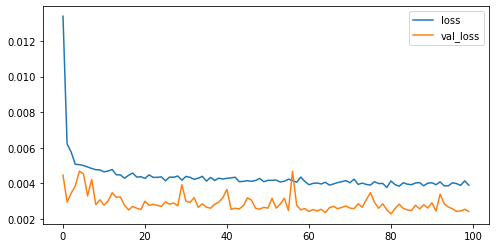

In [79]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(8,4))

In [80]:
nn_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report \n\n", classification_report(y_test,nn_pred))
print("Confusion Matrix \n\n", confusion_matrix(y_test,nn_pred))

Classification Report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.91      0.74      0.82        97

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix 

 [[56858     7]
 [   25    72]]


In [81]:
import random
random.seed(3)
random_ind = random.randint(0,len(df))

test_transaction = df.drop('Class',axis=1).iloc[random_ind]
test_transaction

Time      77415.000000
V1           -0.731833
V2            0.631244
V3            1.352622
V4           -0.250513
V5            0.829905
V6            1.425032
V7            0.359005
V8            0.682196
V9           -0.721615
V10          -0.777572
V11           2.199711
V12           0.303323
V13          -1.226696
V14           0.191112
V15           1.398352
V16          -0.659118
V17           1.042950
V18          -1.396318
V19          -1.257195
V20          -0.130662
V21          -0.013267
V22          -0.095202
V23           0.154927
V24          -1.098428
V25          -0.691598
V26           0.160788
V27           0.122187
V28           0.106039
Amount       34.990000
Name: 124761, dtype: float64

In [82]:
model.predict(test_transaction.values.reshape(1,30))

array([[1.]], dtype=float32)

In [83]:
df['Class'].iloc[random_ind]

0

The neural network performed well but was less accurate in its predictions than the KNN and random forest models. This is likely because neural networks tend to perform better on tasks with very large data sets and many input parameters, such as image analysis or voice recognition or because the model was not optimised. The model with the best overall prediction is the random forest classifier, which correctly classified 80 out of 97 fraudulent transactions and only classified 2 legitimate transactions out of 56,865 as wrongly fraudulent.

Further work on this project could involve developing the KNN classifier for a larger number of nearest neighbour, though this is quite computationally expensive given the very large number of examples in this data set. Alternatively the neural network could be developed in order to optimise performance, to see if this approach could challenge the KNN and random forest models in predictive accuracy.